# Pairwise alignment of drosophila stereo-seq dataset

In [1]:
import os
import sys
from pathlib import Path
import anndata as ad

sys.path.insert(0, "/home/yao/PythonProject/Yao_packages/morpho")
import morpho

## Read data and create AnnData object

In [2]:
os.chdir("/media/yao/Yao/Projects/Project_morpho/slices-E8-10_b")
save_image_folder = "slices_image"
Path(save_image_folder).mkdir(parents=True, exist_ok=True)

In [3]:
slice1 = ad.read_h5ad("cellbin_h5ad/E8-10_b_S10.h5ad")
slice2 = ad.read_h5ad("cellbin_h5ad/E8-10_b_S11.h5ad")

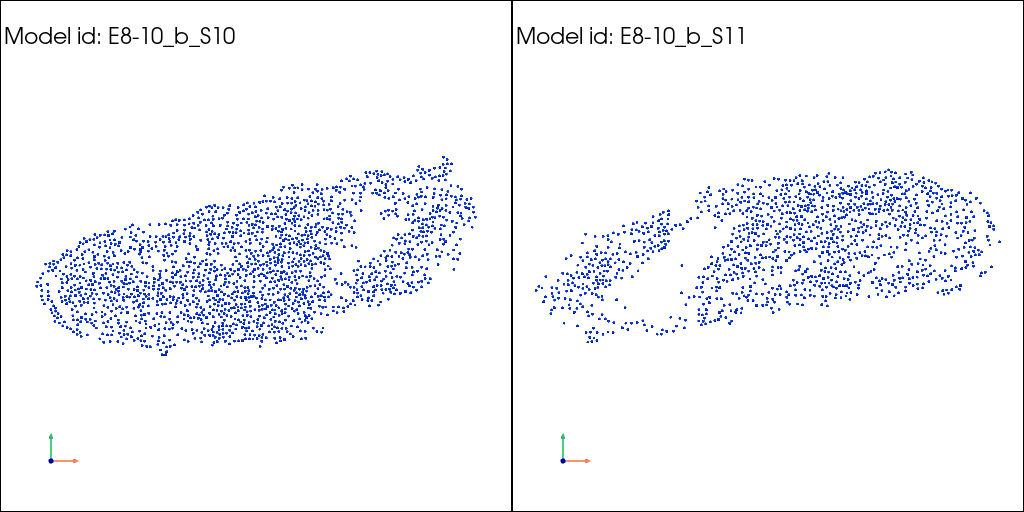

In [4]:
_ = morpho.multi_models(
    [slice1, slice2], spatial_key="spatial", center_zero=True, id_key="slices", jupyter="static",
    filename=os.path.join(save_image_folder, "E8-10_b_pairwise_raw_spatial_slices.pdf")
)

## Slices alignment based on Morpho

In [5]:
align_slices1, morpho_pis = morpho.morpho_align(
    models=[slice1.copy(), slice2.copy()],
    spatial_key="spatial",
    key_added="align_spatial",
    normalize_c=True,
    device="0",
    verbose=False,
)

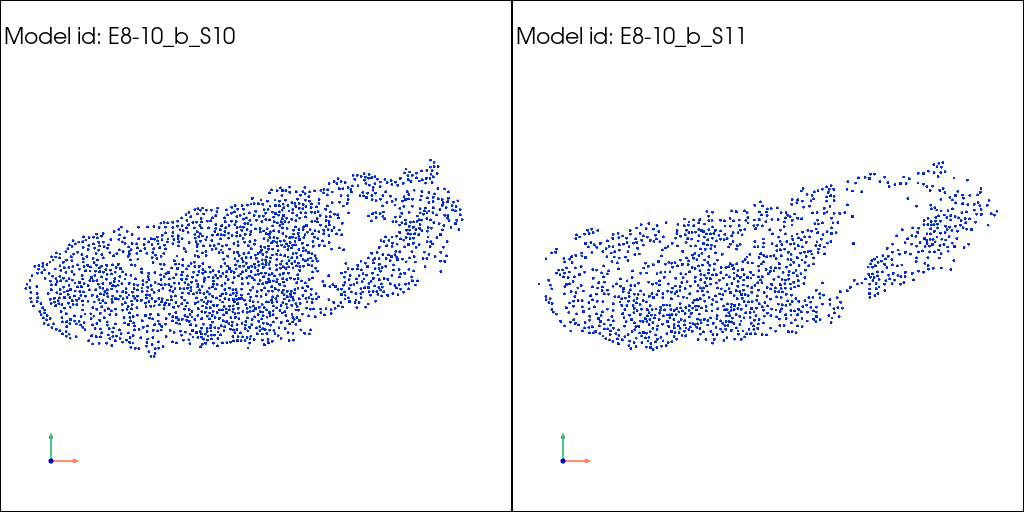

In [6]:
_ = morpho.multi_models(
    align_slices1, spatial_key="align_spatial", id_key="slices", jupyter="static",
    filename=os.path.join(save_image_folder, "E8-10_b_pairwise_morpho_spatial_slices.pdf")
)

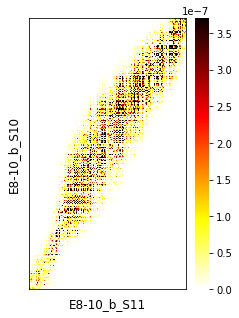

In [7]:
morpho_pi = morpho_pis[0].T
morpho.pi_heatmap(
    pi=morpho_pi, model1_name="E8-10_b_S10", model2_name="E8-10_b_S11", robust=True,
    filename=os.path.join(save_image_folder, "E8-10_b_pairwise_morpho_pi_heatmap.png")
)

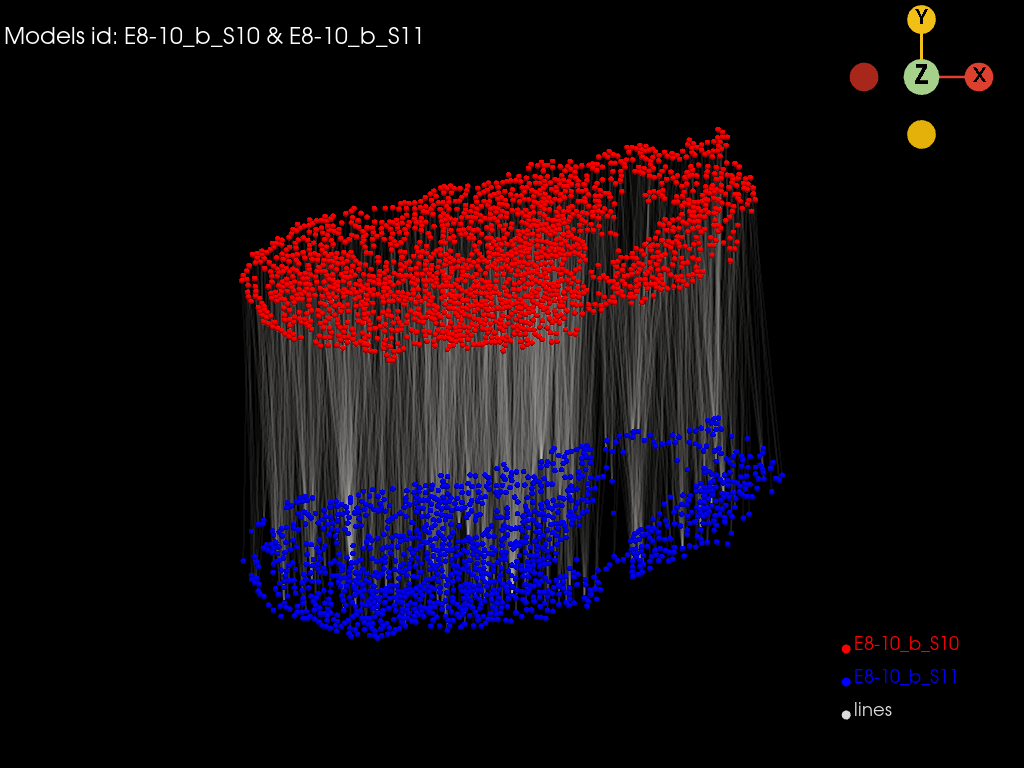

In [8]:
_, _, _ = morpho.cell_connections(
    adataA=align_slices1[0],
    adataB=align_slices1[1],
    pi=morpho_pi,
    spatial_key="align_spatial",
    jupyter="static",
    filename=os.path.join(save_image_folder, "E8-10_b_pairwise_morpho_connections.png")
)

## Slices alignment based on Paste

In [9]:
align_slices2, paste_pis = morpho.models_align(
    models=[slice1.copy(), slice2.copy()],
    spatial_key="spatial",
    key_added="align_spatial",
    alpha=0.01,
    device="0",
)

|-----> [Models alignment] in progress: 100.0000%|-----> Filtered all samples for common genes. There are 8257 common genes.
|-----> [Models alignment] in progress: 100.0000%
|-----> [Models alignment] finished [2.9561s]


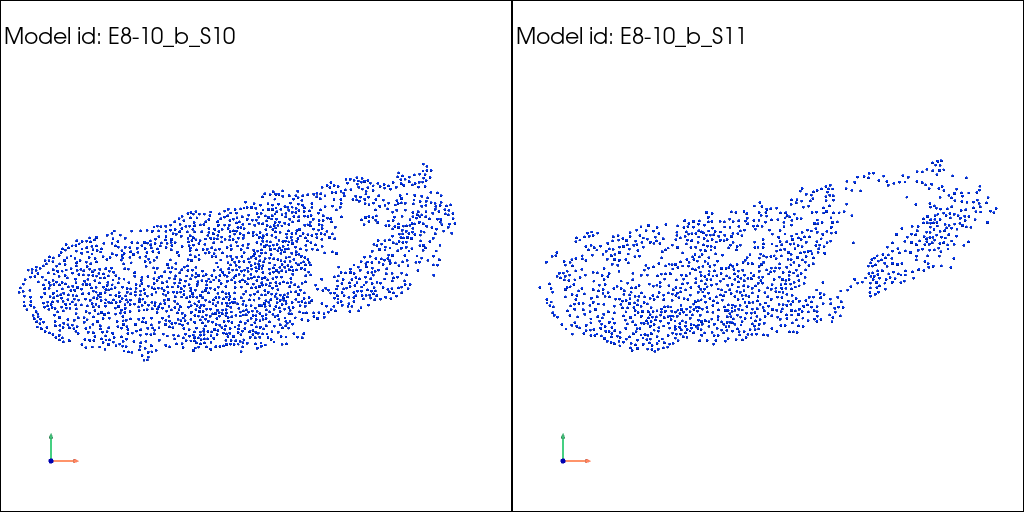

In [10]:
_ = morpho.multi_models(
    align_slices2, spatial_key="align_spatial", id_key="slices", jupyter="static",
    filename=os.path.join(save_image_folder, "E8-10_b_pairwise_paste_spatial_slices.pdf")
)

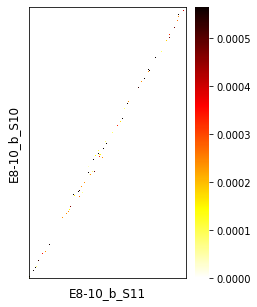

In [11]:
paste_pi = paste_pis[0]
morpho.pi_heatmap(
    pi=paste_pi, model1_name="E8-10_b_S10", model2_name="E8-10_b_S11", robust=False,
    filename=os.path.join(save_image_folder, "E8-10_b_pairwise_paste_pi_heatmap.png")
)

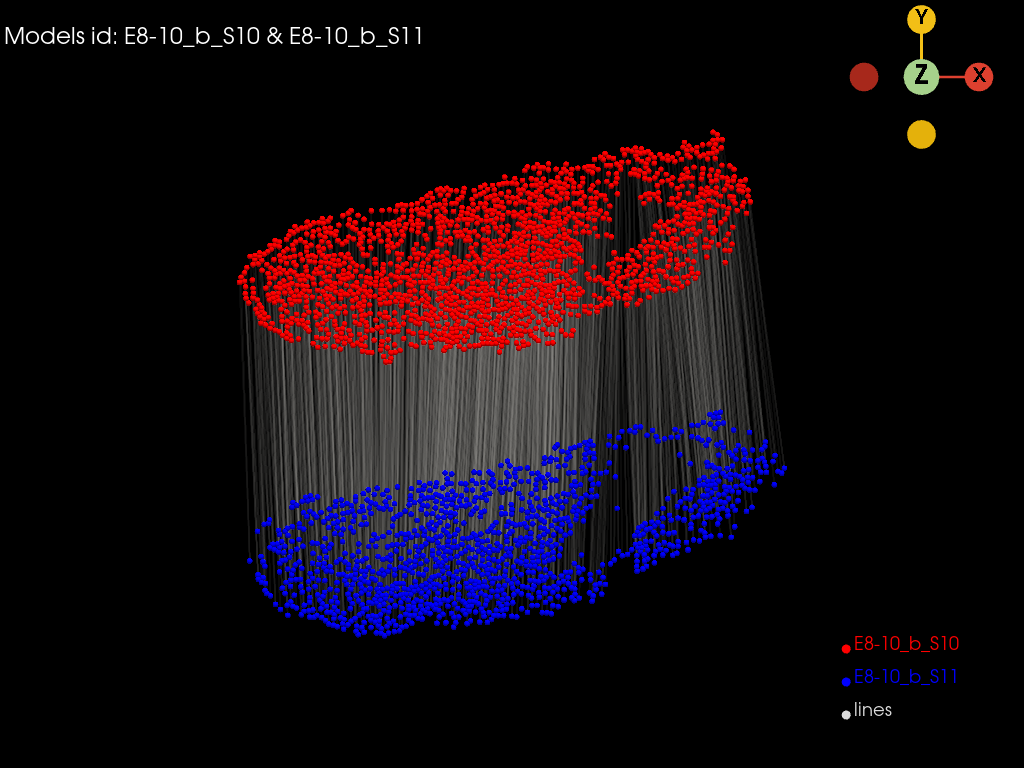

In [12]:
_, _, _ = morpho.cell_connections(
    adataA=align_slices2[0],
    adataB=align_slices2[1],
    pi=paste_pi,
    spatial_key="align_spatial",
    jupyter="static",
    filename=os.path.join(save_image_folder, "E8-10_b_pairwise_paste_connections.png")
)